1
2


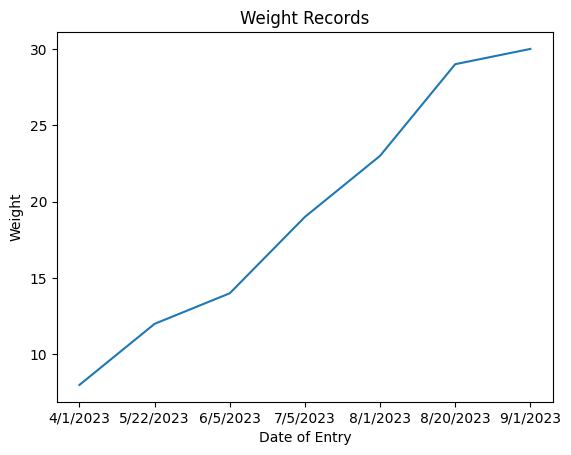

In [32]:
#!pip3 install pillow
import matplotlib
import numpy as np
import pandas as pd
import time
from calendar import timegm
#from time import strftime
import datetime
from rapidfuzz import fuzz, process
from PIL import Image
import csv
import os
duttontest = 'data\Dutton.csv'
puppy_profile_file = 'data\PuppyProfiles.csv'
DOB = ''

"""#Read petProfile csv file
def load_file(fileIndex):

    csv_file=petFile[fileIndex]
    df = pd.read_csv(csv_file)

    return(df)"""

#Read PetProfile csv file
def read_profile_file(petProfileCSV=puppy_profile_file):

    df = pd.read_csv(petProfileCSV)

    return(df)

#Read CSV file from puppy profile
def read_pet_file_from_csv(): 

    readFile = pd.read_csv(read_profile_file()["csvFile"].loc[int(whichfile())])

    return(readFile)

#Read csv file path location from puppy profile
def read_path_location_from_csv():

    pupCSVPath = read_profile_file()["csvFile"].loc[int(whichfile())]
    
    return(pupCSVPath)

def whichfile():
    usersearch = input("Which profile would you like to review?")
    return int(usersearch)

#Adds new row to file for new pet weight record
def add_new_weight_record():
    csv_file = read_path_location_from_csv()

    input_date = input("Input Date: ")
    weight = input("Input weight: ")
    image = input("Select Image: ")
    comment = input("Input comment: ")
    # Define the user data as a list
    user_data = [input_date, weight, image, comment]

    try:
        # Open the CSV file in append mode
        with open(csv_file, mode='a', newline='') as csvfile:
            # Create a CSV writer
            writer = csv.writer(csvfile)
            
            # Write the user data to the CSV file
            writer.writerow(user_data)
            
        print("User data added successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")

    """    
    csv_file=petFile[fileIndex]

    input_date = input("Input Date: ")
    weight = input("Input weight: ")
    image = input("Select Image: ")
    comment = input("Input comment: ")
    # Define the user data as a list
    user_data = [input_date, weight, image, comment]

    try:
        # Open the CSV file in append mode
        with open(csv_file, mode='a', newline='') as csvfile:
            # Create a CSV writer
            writer = csv.writer(csvfile)
            
            # Write the user data to the CSV file
            writer.writerow(user_data)
            
        print("User data added successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")
        """    

#Adds a new pet to file.
def add_new_pet(file=puppy_profile_file):
    
    pet_ID = input("Input PetID:")
    pet_name = input("Input Pet's Name: ")
    DOB = input("Input pet's Date of Birth: ")
    breed = input("Input Breed: ")
    image = input("Input Image: " )
    csvFile = write_new_csv_file(pet_name)
    # Define the user data as a list
    user_data = [pet_ID, pet_name, DOB, breed, image, csvFile]

    try:
        # Open the CSV file in append mode
        with open(file, mode='a', newline='') as csvfile:
            # Create a CSV writer
            writer = csv.writer(csvfile)
            
            # Write the user data to the CSV file
            writer.writerow(user_data)
            
        print("User data added successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")

#Prints out individual pet's row records, e.g. an entry for a day
def print_indvidual_entry_record():
    
    df = read_pet_file_from_csv()
    userSearch = input("What record do you want to return?")
    r = df.loc[int(userSearch)]
    print(r, "\n")

    """
    def print_indvidual_entry_record(fileIndex):
    csv_file=petFile[fileIndex]
    df = pd.read_csv(csv_file)
    userSearch = input("What record do you want to return?")
    r = df.loc[int(userSearch)]
    print(r, "\n")"""

#Returns individual pet's weight records
def print_weight_record_for_individual():
    
    df = read_pet_file_from_csv()
    userSearch = input("What weight do you wan to return?")

    r = df["Weight"].loc[int(userSearch)]
    #weight = df["Weight"].loc[r]
    #print({weight})
    print(r)

#Calculates age
def getAge(): #DOB = '01/05/2023', , date_of_entry = '05/02/2023'
    """Calculate the age based on all of the Date fields from the PetRecord.csv file and compares to the DOB field from the pets.csv file."""

    #read dateofEntry for weight
    dr = read_pet_file_from_csv()
    r = input("What weight do you want?")
    date_of_entry = dr["DateofEntry"].loc[int(r)]
    print("Date of Entry selected: " + r)
    print({date_of_entry})  

    #read DOB from PetProfile
    df = read_profile_file()
    DOB = df["Date of Birth"].loc[int(r)]
    name = df["Pets Name"].loc[int(r)]
    print("Name:" + name)
    print({DOB}) 

    DOButc_time = time.strptime(DOB + ' 00:00:00', "%m/%d/%Y %H:%M:%S")
    DOBepoch_time = timegm(DOButc_time)

    DOEutc_time = time.strptime(date_of_entry + ' 00:00:00', "%m/%d/%Y %H:%M:%S")
    DOEepoch_time = timegm(DOEutc_time)

    #Print the age
    #Print(f"The person is "  + str(epoch_time) + " years old.")
    #print("UTC " + str(DOButc_time))
    #print("DOBepoch_time " + str(DOBepoch_time))
    #print("Month " + str(DOButc_time.tm_mon))
    #print("Day " + str(DOButc_time.tm_mday))
    #print("Year " + str(DOButc_time.tm_year))

    #Calculate the age
    age = DOEepoch_time - DOBepoch_time #Subtract the DateOfEntry = DateOfBirth
    #print("Age " + str(age))
    print("Days: " + str(age/(3600 * 24))) # ((60 seconds * 60 minutes) = 3600 * 24 hours)
    print("Months: " + str(age/(60 * 60 * 24 * 30))) # (60 seconds * 60 minutes * 24 hours * 30 days)
    print("Years: " + str(age/(3600 * 24 * 365))) # ((60 seconds * 60 minutes) = 3600 seconds * 24 hours * 365 days)

    """
    csv_file=petFile[fileIndex]
    df = pd.read_csv(pup)
    r = 1
    DOB = df["Date of Birth"].loc[r]
    print({DOB})

    df = pd.read_csv(csv_file)
    r = 1
    date_of_entry = df["DateofEntry"].loc[r]
    print({date_of_entry})   

    DOButc_time = time.strptime(DOB + ' 00:00:00', "%m/%d/%Y %H:%M:%S")
    DOBepoch_time = timegm(DOButc_time)

    DOEutc_time = time.strptime(date_of_entry + ' 00:00:00', "%m/%d/%Y %H:%M:%S")
    DOEepoch_time = timegm(DOEutc_time)

    #Print the age
    #Print(f"The person is "  + str(epoch_time) + " years old.")
    #print("UTC " + str(DOButc_time))
    #print("DOBepoch_time " + str(DOBepoch_time))
    #print("Month " + str(DOButc_time.tm_mon))
    #print("Day " + str(DOButc_time.tm_mday))
    #print("Year " + str(DOButc_time.tm_year))

    #Calculate the age
    age = DOEepoch_time - DOBepoch_time #Subtract the DateOfEntry = DateOfBirth
    #print("Age " + str(age))
    print("Days: " + str(age/(3600 * 24))) # ((60 seconds * 60 minutes) = 3600 * 24 hours)
    print("Months: " + str(age/(60 * 60 * 24 * 30))) # (60 seconds * 60 minutes * 24 hours * 30 days)
    print("Years: " + str(age/(3600 * 24 * 365))) # ((60 seconds * 60 minutes) = 3600 seconds * 24 hours * 365 days)
"""

#loads image for profile
def get_puppy_profile_image():

    r = input("What image do you want?")
    pupImage = read_profile_file()["Profile Image"].loc[int(r)]
    # load and show images
    img = Image.open(pupImage)
    display(img) # in jupyter, the image is shown as output
    
    """df = pd.read_csv(pup)
    r = input("What image do you want?")
    pupImage = df["Profile Image"].loc[int(r)]
    # load and show images
    img = Image.open(pupImage)
    display(img) # in jupyter, the image is shown as output"""

#loads image from pet's individual csv file.
def get_individual_image():

    df = read_pet_file_from_csv()
    r = input("What image do you want?")
    pupImage = df["Image"].loc[int(r)]
    # load and show images
    img = Image.open(pupImage)
    display(img) # in jupyter, the image is shown as output   

    """    read_pet_file_from_csv()
    csv_file=petFile[fileIndex]
    df = pd.read_csv(csv_file)
    r = input("What image do you want?")
    pupImage = df["Image"].loc[int(r)]
    # load and show images
    img = Image.open(pupImage)
    display(img) # in jupyter, the image is shown as output """

# gets dog's profile based on PetID.
def get_uniquedogprofile():
    '''returns dog's profiles based on petID.'''
    
    df = read_profile_file()
    userSearch = input("What pet's profile do you want to see?")

    r = df.loc[int(userSearch)]
    print(r, "\n")

def write_new_csv_file(pet_name): #create file
    # Get user input for the file name and data
    folder_path = 'data'
    #pet_name = input("Enter the name of the new pet: ")
    csv_file_name = pet_name+'.csv'
    # Combine the folder path and file name to create the full file path
    file_path = os.path.join(folder_path, csv_file_name)
    print(csv_file_name)

    # Data to be written to the CSV file
    data = [
        ['DateofEntry', 'Weight', 'Image', 'Comment']
    ]
    #Create csv file
    with open(file_path, 'w') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerows(data)
    return file_path
    
# Delete file from profile file
def delete_pet_row_from_file(file=puppy_profile_file):

    df = pd.read_csv(file)

    # Prompt the user for the criteria to identify the row to be deleted
    delete_pet_name = input("What to delete: ")

    #Delete the CSV file before deleting the row.
    csvFileToDelete = df["csvFile"].loc[int(delete_pet_name)]
    delete_csv_file(csvFileToDelete)

    # Filter the DataFrame to remove the row(s) matching the criteria
    df = df[df['PetID'] != int(delete_pet_name)]
    #Save the updated DataFrame back to the CSV file
    df.to_csv(file, index=False)

# Delete row from weight file
def delete_weight_row_from_file():
    csv_file = read_path_location_from_csv()
    df = pd.read_csv(csv_file)

    # Prompt the user for the criteria to identify the row to be deleted
    delete_weight = input("What Date Of Entry do you want to delete? ")

    # Filter the DataFrame to remove the row(s) matching the criteria
    df = df[df['DateofEntry'] != delete_weight]  #DateofEntry is the column to identify the row

    # Save the updated DataFrame back to the CSV file
    df.to_csv(csv_file, index=False)

    print(f"Row for {delete_weight} has been deleted from the CSV file.")   

def delete_csv_file(csv_file):
    #folder_path = 'data'
    #csv_file = read_path_location_from_csv()  # Replace with the path to your CSV file
    #csv_file = 'data/test.csv'
    # Check if the file exists before attempting to delete it
    if os.path.exists(csv_file):
        os.remove(csv_file)
        print(f"CSV file '{csv_file}' has been deleted.")
    else:
        print(f"CSV file '{csv_file}' does not exist.")
 
#Plots csv file into plotly
def plotcsv():
    '''Plots pet csv file based on PetID selected by user. '''
    # Read the CSV file into a DataFrame
    csv_file = read_pet_file_from_csv()
    print("1")
    #csv_file = 'data\Dutton.csv' # Replace with your CSV file path
    #df = pd.read_csv(csv_file)
    print('2')

    # Extract X and Y data
    x = csv_file['DateofEntry']
    y = csv_file['Weight']

    # Create a basic line plot
    plt.plot(x, y)

    # Customize the plot (optional)
    plt.title('Weight Records')
    plt.xlabel('Date of Entry')
    plt.ylabel('Weight')

    # Display the plot (or save it to a file)
    plt.show()

plotcsv()
#delete_csv_file()
#write_new_csv_file()

#TheFile = whichfile()
#load_file(TheFile)

#delete_pet_row_from_file()
#delete_weight_row_from_file()
#read_profile_file()
#read_pet_file_from_csv()
#read_path_location_from_csv()

#add_new_pet()
#read_pet_file_from_csv()
#add_new_weight_record()
#add_new_pet()
#print_indvidual_entry_record()
#print_weight_record_for_individual()
#getAge()
#get_puppy_profile_image()
#get_individual_image()
#get_uniquedogprofile()



#printFile = load_file(TheFile)
#print(printFile)
#get_uniquedogprofile()

